In [1]:
# from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset
import numpy as np
import xarray as xr

# from matplotlib.mlab import bivariate_normal

import cartopy.crs as ccrs
import xarray as xr

import math

import matplotlib.pyplot as plt
import cartopy.crs as crs
import cartopy.feature as cfeature
import matplotlib.colors as colors
from matplotlib.cm import get_cmap
from matplotlib import ticker
import matplotlib.gridspec as gridspec
from matplotlib.ticker import EngFormatter, StrMethodFormatter

from cartopy import config
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point

from IPython.display import Image

from copy import copy
from tqdm import tqdm
import os 

In [3]:
ds = xr.open_dataset('/n/home12/hongwei/HONGWEI/Tropopause/ERA5low_wmo_2nd_z_2005-2009_daymean.nc')

In [4]:
ds

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 181, lon: 361, time: 1826)
Coordinates:
  * time       (time) datetime64[ns] 2005-01-01T09:00:00 ... 2009-12-31T09:00:00
  * lon        (lon) float64 -180.0 -179.0 -178.0 -177.0 ... 178.0 179.0 180.0
  * lat        (lat) float64 -90.0 -89.0 -88.0 -87.0 ... 87.0 88.0 89.0 90.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    wmo_2nd_z  (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.3.0 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Sat Feb 03 18:12:50 2024: cdo -daymean ERA5low_wmo_2nd_z_20...
    frequency:    day
    CDO:          Climate Data Operators version 2.3.0 (https://mpimet.mpg.de...

In [5]:
time = ds['time']
lon = ds['lon']
lat = ds['lat']

Nt = len(time)
Nx = len(lon)
Ny = len(lat)

Double_Tropo = ds['wmo_2nd_z']

In [6]:
lat

<xarray.DataArray 'lat' (lat: 181)>
array([-90., -89., -88., -87., -86., -85., -84., -83., -82., -81., -80., -79.,
       -78., -77., -76., -75., -74., -73., -72., -71., -70., -69., -68., -67.,
       -66., -65., -64., -63., -62., -61., -60., -59., -58., -57., -56., -55.,
       -54., -53., -52., -51., -50., -49., -48., -47., -46., -45., -44., -43.,
       -42., -41., -40., -39., -38., -37., -36., -35., -34., -33., -32., -31.,
       -30., -29., -28., -27., -26., -25., -24., -23., -22., -21., -20., -19.,
       -18., -17., -16., -15., -14., -13., -12., -11., -10.,  -9.,  -8.,  -7.,
        -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,   2.,   3.,   4.,   5.,
         6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,
        18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,
        30.,  31.,  32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,
        42.,  43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,
        54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,
        90.])
Coordinates:
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north
    axis:           Y

In [7]:
Double_Tropo

<xarray.DataArray 'wmo_2nd_z' (time: 1826, lat: 181, lon: 361)>
[119312666 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2005-01-01T09:00:00 ... 2009-12-31T09:00:00
  * lon      (lon) float64 -180.0 -179.0 -178.0 -177.0 ... 178.0 179.0 180.0
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
Attributes:
    long_name:     WMO 2nd tropopause height
    units:         km
    cell_methods:  time: mean

In [8]:
DT_freq = Double_Tropo/Double_Tropo

In [9]:
DT_freq[0,:,:]

<xarray.DataArray 'wmo_2nd_z' (lat: 181, lon: 361)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    time     datetime64[ns] 2005-01-01T09:00:00
  * lon      (lon) float64 -180.0 -179.0 -178.0 -177.0 ... 178.0 179.0 180.0
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0

In [10]:
Nt, Nx, Ny

(1826, 361, 181)

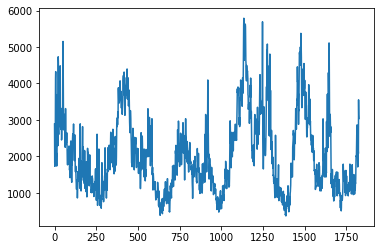

In [11]:
DT_freq_total = np.nansum(DT_freq[:,:,:], axis=(1,2))
plt.plot(DT_freq_total)

# Difference of double tropopause between QBO E-W phases

In [18]:
# there is a 3-month time lag

time_lag = 7*30

it_w1 = 0+time_lag
it_w2 = 4*30+time_lag

it_w3 = 365*2+time_lag
it_w4 = 365*2+4*30+time_lag

it_w5 = 365*4+time_lag
it_w6 = 365*4+4*30+time_lag

N_day_W = it_w6-it_w5 + it_w4-it_w3 + it_w2-it_w1

DT_freq_W1 = np.nansum(DT_freq[it_w1:it_w2,:,:], axis=0)
DT_freq_W2 = np.nansum(DT_freq[it_w3:it_w4,:,:], axis=0)
DT_freq_W3 = np.nansum(DT_freq[it_w5:it_w6,:,:], axis=0)

DT_freq_West = (DT_freq_W1+DT_freq_W2+DT_freq_W3) / N_day_W


###
it_e1 = 365*1+time_lag
it_e2 = 365*1+4*30+time_lag

it_e3 = 365*3+time_lag
it_e4 = 365*3+4*30+time_lag

N_day_E = it_e4-it_e3 + it_e2-it_e1

DT_freq_E1 = np.nansum(DT_freq[it_e1:it_e2,:,:], axis=0)
DT_freq_E2 = np.nansum(DT_freq[it_e3:it_e4,:,:], axis=0)

DT_freq_East = (DT_freq_E1+DT_freq_E2) / N_day_E

(181, 361)


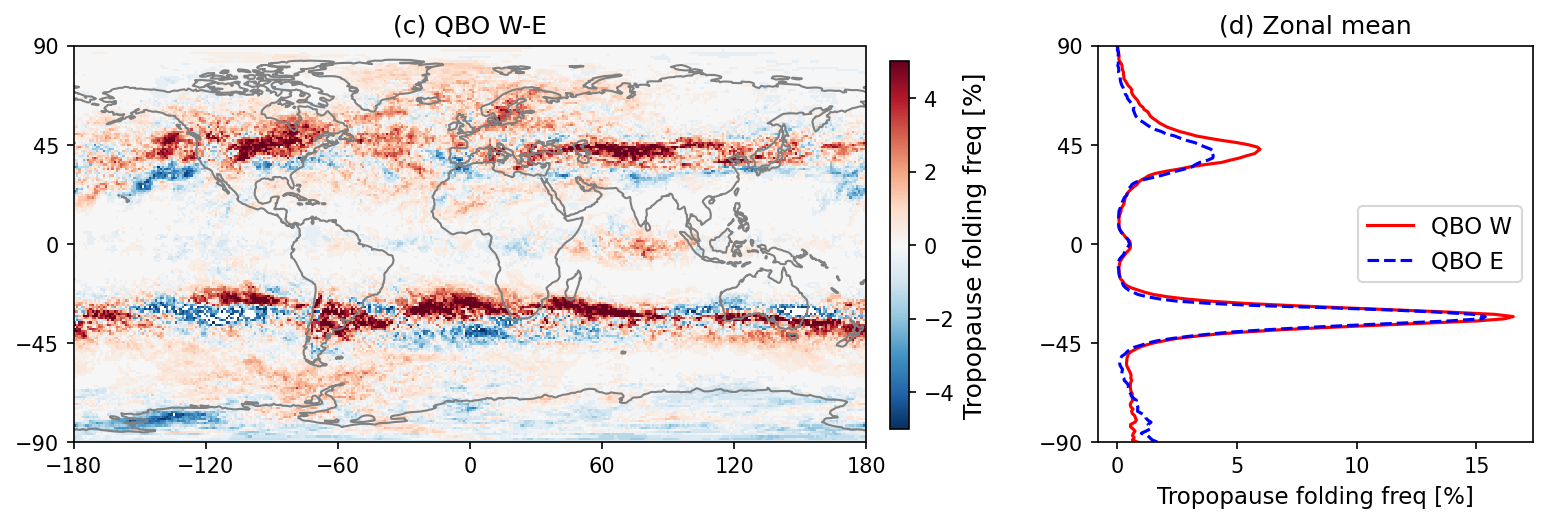

In [23]:
DT_freq_West_Xmean = np.nanmean(DT_freq_West, axis=1)
DT_freq_East_Xmean = np.nanmean(DT_freq_East, axis=1)

X, Y = np.meshgrid(lon, lat)

Num_min = -5
Num_max = 5

palette = copy(plt.get_cmap('RdBu_r'))
palette.set_under('white', 1.0)


fig = plt.figure(figsize=(13,3.5), dpi=150)
gs = gridspec.GridSpec(1, 10, figure=fig)
projection = crs.PlateCarree()

extent = [-180 , 180 , 90 , -90]


###
ax1 = fig.add_subplot(gs[0, 0:6], projection=projection)

ax1.set_global()
ax1.set_extent([-180, 180, 90, -90], crs=projection) ## Important
ax1.add_feature(cfeature.COASTLINE, edgecolor="gray")

palette = copy(plt.get_cmap('RdBu_r'))
palette.set_under('white', 1.0)

data = 100*(DT_freq_West - DT_freq_East)
ax1_pixel = plt.imshow(data, vmin=Num_min, vmax=Num_max,\
           extent = extent, cmap=palette, interpolation='nearest')

cax = fig.add_axes([0.57, 0.15, 0.01, 0.7])    
cb1 = plt.colorbar(ax1_pixel, cax=cax, ax=ax1, orientation="vertical")
# cb1 = plt.colorbar(ax1_pixel, ax=ax1, orientation="horizontal")

cb1.set_label('Tropopause folding freq [%]', fontsize=12);

ax1.set_xticks(np.linspace(-180, 180, 7), crs=projection)
ax1.set_yticks(np.linspace(-90, 90, 5), crs=projection)

ax1.set_title("(c) QBO W-E");

print(data.shape)


###
ax2 = fig.add_subplot(gs[0, 7:10])


ax2.plot(100*DT_freq_West_Xmean, lat, 'r-',  label="QBO W")
ax2.plot(100*DT_freq_East_Xmean, lat, 'b--', label="QBO E")


ax2.set_ylim(-90,90)
ax2.set_yticks((-90,-45,0,45,90))
# ax2.set_yticklabels(-90,-45,0,45,90)

ax2.set_xlabel("Tropopause folding freq [%]", fontsize=11);
ax2.set_title("(d) Zonal mean");

ax2.legend(fontsize=11, loc='center right');
# plt.tight_layout()

# Annual and seasonal mean of double tropopause

In [ ]:
N_yr = 5
N_day = 365
DT_freq_new = np.zeros((N_day, N_yr, Ny, Nx))


In [ ]:
for iyr in range(N_yr):
    for iday in range(N_day):
        it = N_day*iyr + iday
        DT_freq_new[iday, iyr, :, :] = DT_freq[it, :, :]

In [ ]:
DT_freq_Annal = np.nansum(DT_freq_new, axis=(0,1))

DT_freq_DJF = np.nansum(DT_freq_new[11*30:12*30,:,:,:], axis=(0,1)) + np.nansum(DT_freq_new[0:2*30,:,:,:], axis=(0,1))
DT_freq_MAM = np.nansum(DT_freq_new[2*30:5*30,:,:,:], axis=(0,1))
DT_freq_JJA = np.nansum(DT_freq_new[5*30:8*30,:,:,:], axis=(0,1))
DT_freq_SON = np.nansum(DT_freq_new[8*30:11*30,:,:,:], axis=(0,1))

In [ ]:
X, Y = np.meshgrid(lon, lat)

ax1_contour = plt.contour(X, Y, DT_freq_Annal, colors='k', linestyles='solid')
plt.clabel(ax1_contour, inline=True, fmt='%.0f', fontsize=8)